In [44]:
# import libraries for the demo
import wrd_client
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates
import pandas as pd
import numpy as np

In [45]:
# define functions for the demo
def extractAnalyteDate(graph_data):
    analyteDateTime = list(
        map(lambda x: matplotlib.dates.datestr2num(x["DateTime"]), graph_data["AnalytesData"][0]["Points"]))
    analyteDateValue = list(map(lambda x: x["Value"], graph_data["AnalytesData"][0]["Points"]))
    return [analyteDateTime, analyteDateValue]

def extractGuidelineData(graph_data):
    analyteDateTime = list(
        map(lambda x: matplotlib.dates.datestr2num(x["DateTime"]), graph_data["GuidelineData"][0]["Points"]))
    analyteDateValue = list(map(lambda x: x["Value"], graph_data["GuidelineData"][0]["Points"]))
    return [analyteDateTime, analyteDateValue]

def highlight_exccedancce(x):
    return ['background-color: yellow' if i == 1 and v > x.iloc[2] else '' for i, v in enumerate(x)]

In [46]:
# instantiate WRD client with provied url and login
client = wrd_client.WRDClient(wrdUrl='', username="", password="")

Session close


In [47]:
# Get location list data
locationData = client.get_locations()
data = pd.DataFrame(locationData)
data.style

In [48]:
# Get location detail data
locationDetailData = client.get_locations_detail("AdC-0.1")
df = pd.DataFrame(locationDetailData)
analytes_df = pd.io.json.json_normalize(locationDetailData["Analytes"])
result = pd.concat([df["Location"], analytes_df], axis= 1)
result.style

In [49]:
#Get guideline list data
guidelineData = client.get_guidelines()
data = pd.DataFrame(guidelineData)
data.style

In [50]:
#Get guideline detail data
guidelineDetailData = client.get_guidelines_detail()
df = pd.DataFrame(guidelineDetailData)
df_info = pd.io.json.json_normalize(df.to_dict('list'), ['AvailableAnalytes']).unstack().apply(pd.Series)
sub_set = df[["Id", "GuidelineName", "GuidelineLongName"]]
sub_set = sub_set.merge(df_info, left_on='Id', right_on='Id', how='inner')
sub_set.style

In [51]:
# request analyte and calculated guideline data
graphData = client.get_graph_data(start_date="Jan 01, 2016",
                                      end_date="May 26, 2017",
                                      station_name="DR-195.8",
                                      analytes=["Aluminum (Al)-Total"],
                                      guidelines=["BC_WWS_ST"])

#print(graphData)
analyte_data = extractAnalyteDate(graph_data=graphData)
guideline_data = extractGuidelineData(graph_data=graphData)

In [52]:
# generate table with exccedance highlight for data
analyte_df = pd.DataFrame(np.column_stack([analyte_data[0], analyte_data[1]]), columns=['DateTime', 'Analyte Value'])
guidelin_df = pd.DataFrame(np.column_stack([guideline_data[0], guideline_data[1]]), columns=['DateTime', 'Guideline Value'])
merged_df = analyte_df.merge(guidelin_df, left_on='DateTime', right_on='DateTime', how='outer')
# merged_df["DateTime"] = merged_df['DateTime'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], format='%Y%m%d'))
merged_df = merged_df.transpose()
merged_df.style.apply(highlight_exccedancce)


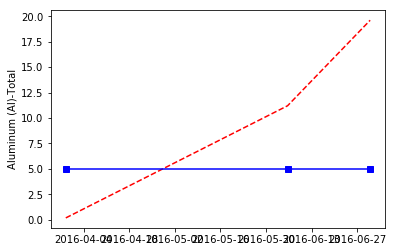

In [53]:
# generate graph for data
plt.plot_date(analyte_data[0], analyte_data[1], 'r--')
plt.plot_date(guideline_data[0], guideline_data[1], 'bs-')

plt.ylabel("Aluminum (Al)-Total")
plt.show()